In [1]:
#useful libraries that as been imported 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf

Using TensorFlow backend.


In [2]:
#reading the datasets
signal_df=pd.read_csv('Part_Signal.csv')
signal_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Univariate analysis for each features
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
Parameter 1        1599 non-null float64
Parameter 2        1599 non-null float64
Parameter 3        1599 non-null float64
Parameter 4        1599 non-null float64
Parameter 5        1599 non-null float64
Parameter 6        1599 non-null float64
Parameter 7        1599 non-null float64
Parameter 8        1599 non-null float64
Parameter 9        1599 non-null float64
Parameter 10       1599 non-null float64
Parameter 11       1599 non-null float64
Signal_Strength    1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
signal_df.dtypes #it show the data type for each feature

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [5]:
signal_df.shape #shape of the data

(1599, 12)

In [6]:
signal_df.columns # it will gives the info regarding the number of columns in the data sets

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

In [7]:
signal_df.describe().transpose() #distribution for each features

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
#Checking for missing values
signal_df.isnull().sum() #from below we can'nt see any missing vlaues in the dataset

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

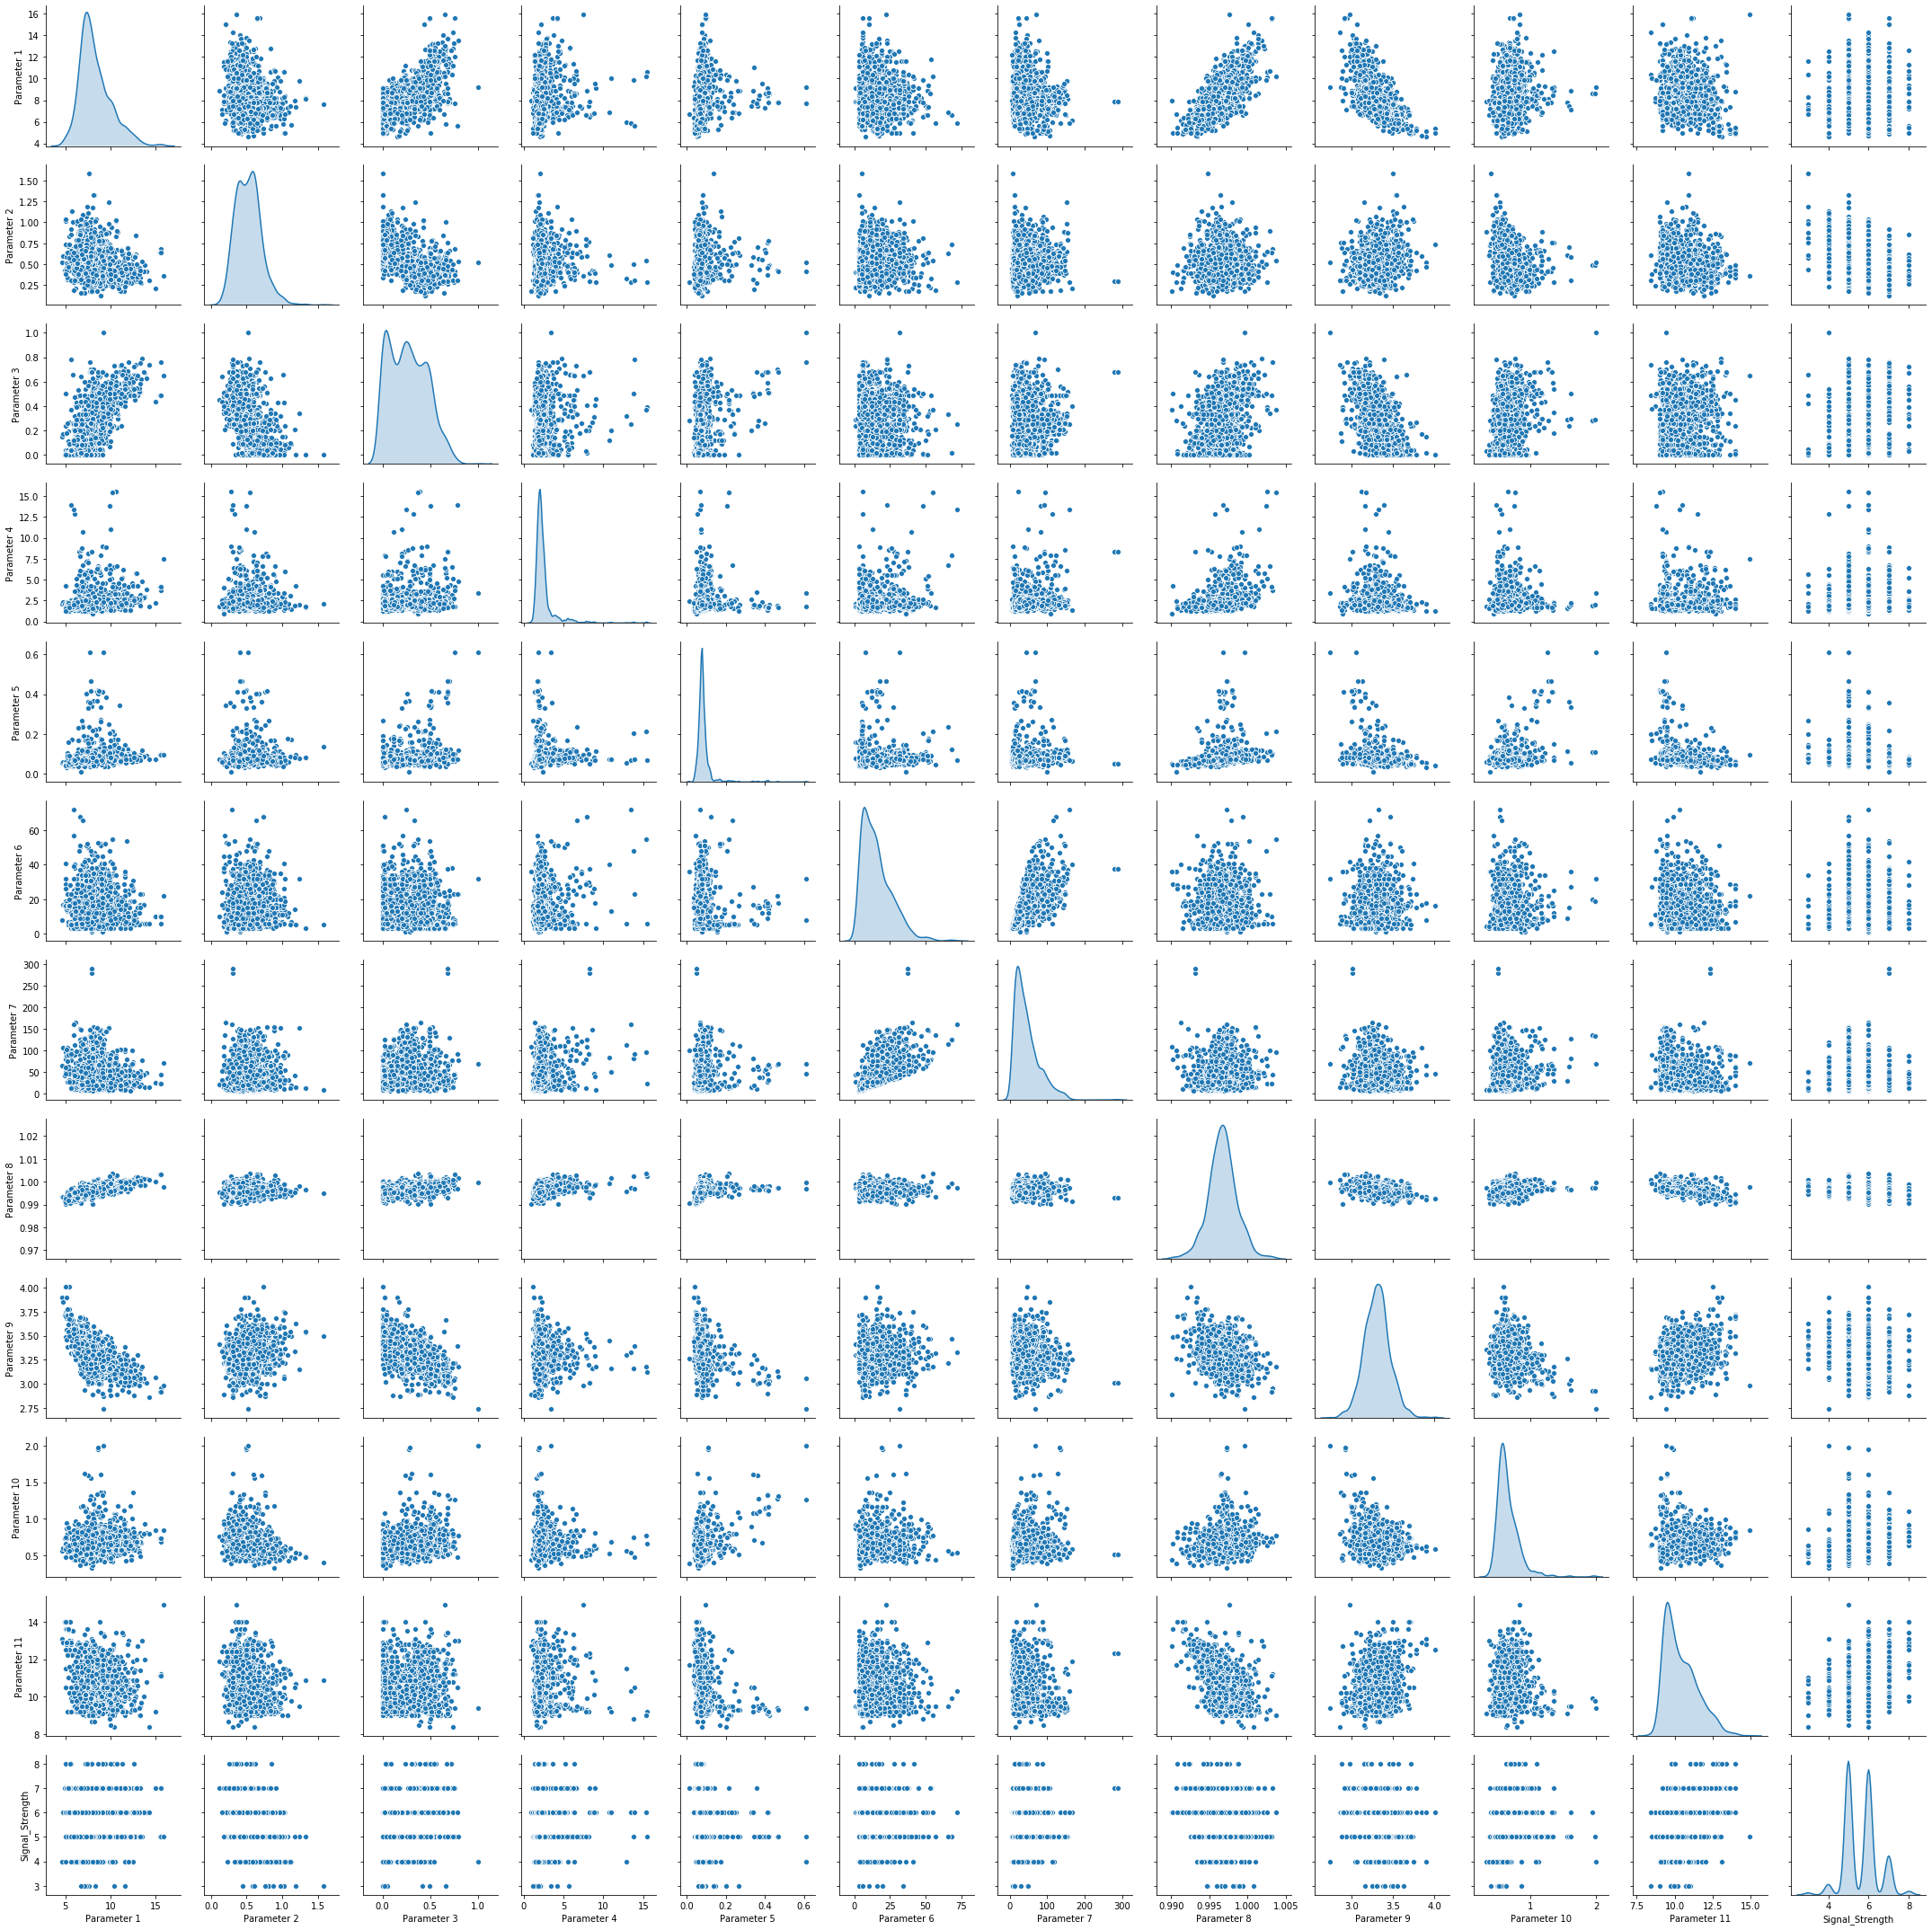

In [9]:
#pairplots
sns.pairplot(signal_df, diag_kind='kde')


In [10]:
#as we can see from pair plots we can see that non of the feature are correlated 

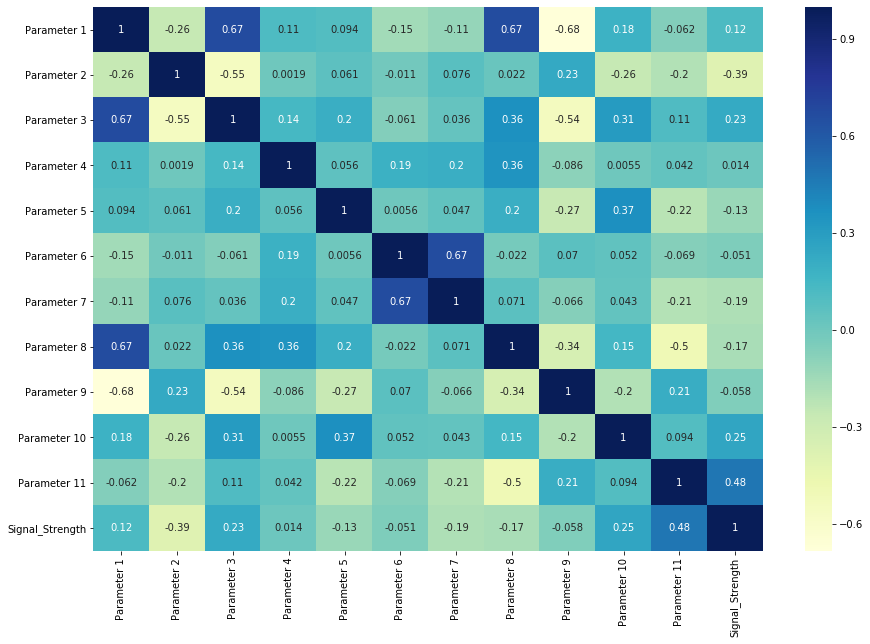

In [11]:
#heat map
signal_df_corr=signal_df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(signal_df_corr,cmap="YlGnBu",annot=True)

In [12]:
signal_df_1=signal_df.corr()
signal_df_1

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [13]:
#discription of each features
#Parameter 1
print('Range of values: ', signal_df['Parameter 1'].max()-signal_df['Parameter 1'].min())

Range of values:  11.3


In [14]:
#Parameter 1
print('Minimum: ', signal_df['Parameter 1'].min())
print('Maximum: ',signal_df['Parameter 1'].max())
print('Mean value: ', signal_df['Parameter 1'].mean())
print('Median value: ',signal_df['Parameter 1'].median())
print('Standard deviation: ', signal_df['Parameter 1'].std())

Minimum:  4.6
Maximum:  15.9
Mean value:  8.319637273295838
Median value:  7.9
Standard deviation:  1.7410963181277006


In [15]:
#finding the outliers
Q1=signal_df['Parameter 1'].quantile(q=0.25)
Q3=signal_df['Parameter 1'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 1']))

1st Quartile (Q1) is:  7.1
3st Quartile (Q3) is:  9.2
Interquartile range (IQR) is  2.0999999999999996


In [16]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 1: ', L_outliers)
print('Upper outliers in Parameter 1: ', U_outliers)

Lower outliers in Parameter 1:  3.95
Upper outliers in Parameter 1:  12.349999999999998


In [17]:
print('Number of outliers in Parameter 1 upper : ', signal_df[signal_df['Parameter 1']>12.349999999999998]['Parameter 1'].count())
print('Number of outliers in Parameter 1 lower : ', signal_df[signal_df['Parameter 1']<3.95]['Parameter 1'].count())
print('% of Outlier in Parameter 1 upper: ',round(signal_df[signal_df['Parameter 1']>12.349999999999998]['Parameter 1'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 1 lower: ',round(signal_df[signal_df['Parameter 1']<3.95]['Parameter 1'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 1 upper :  49
Number of outliers in Parameter 1 lower :  0
% of Outlier in Parameter 1 upper:  3.0 %
% of Outlier in Parameter 1 lower:  0.0 %


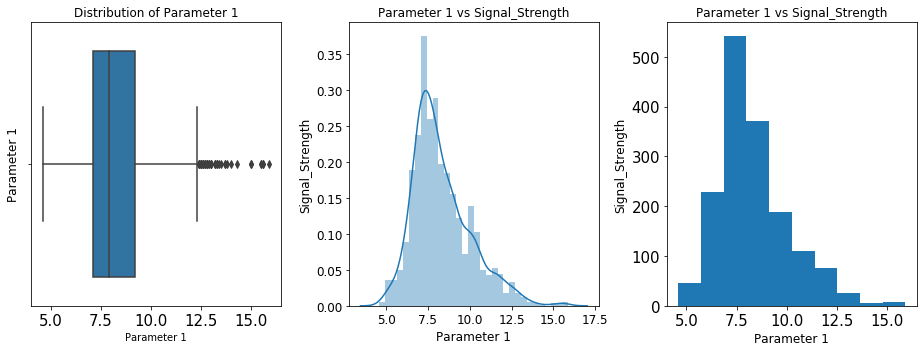

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 1',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 1', fontsize=12)
ax1.set_title('Distribution of Parameter 1', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 1'],ax=ax2)
ax2.set_xlabel('Parameter 1', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 1 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 1'])
ax3.set_xlabel('Parameter 1', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 1 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [19]:
#as we can see from the data parameter 1 as some outliers 

In [20]:
#discription of each features
#Parameter 1
print('Range of values: ', signal_df['Parameter 2'].max()-signal_df['Parameter 2'].min())

Range of values:  1.46


In [21]:
#Parameter 1
print('Minimum: ', signal_df['Parameter 2'].min())
print('Maximum: ',signal_df['Parameter 2'].max())
print('Mean value: ', signal_df['Parameter 2'].mean())
print('Median value: ',signal_df['Parameter 2'].median())
print('Standard deviation: ', signal_df['Parameter 2'].std())

Minimum:  0.12
Maximum:  1.58
Mean value:  0.5278205128205131
Median value:  0.52
Standard deviation:  0.17905970415353498


In [22]:
#finding the outliers
Q1=signal_df['Parameter 2'].quantile(q=0.25)
Q3=signal_df['Parameter 2'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 2']))

1st Quartile (Q1) is:  0.39
3st Quartile (Q3) is:  0.64
Interquartile range (IQR) is  0.25


In [23]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 2: ', L_outliers)
print('Upper outliers in Parameter 2: ', U_outliers)

Lower outliers in Parameter 2:  0.015000000000000013
Upper outliers in Parameter 2:  1.0150000000000001


In [24]:
print('Number of outliers in Parameter 2 upper : ', signal_df[signal_df['Parameter 2']>1.0150000000000001]['Parameter 2'].count())
print('Number of outliers in Parameter 2 lower : ', signal_df[signal_df['Parameter 2']<0.015000000000000013]['Parameter 2'].count())
print('% of Outlier in Parameter 2 upper: ',round(signal_df[signal_df['Parameter 2']>1.0150000000000001]['Parameter 2'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 2 lower: ',round(signal_df[signal_df['Parameter 2']<0.015000000000000013]['Parameter 2'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 2 upper :  19
Number of outliers in Parameter 2 lower :  0
% of Outlier in Parameter 2 upper:  1.0 %
% of Outlier in Parameter 2 lower:  0.0 %


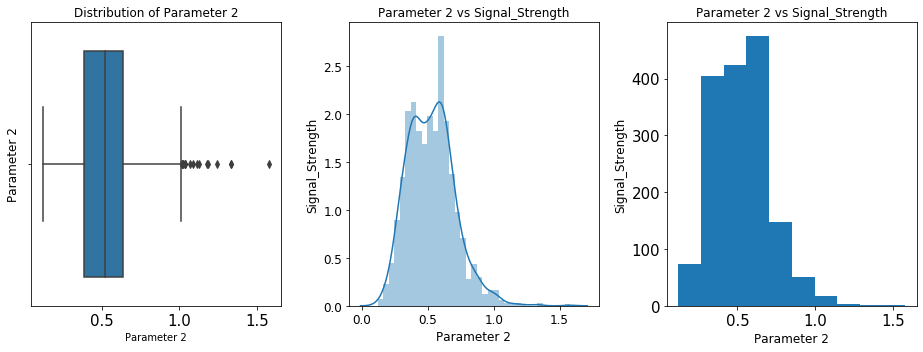

In [25]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 2',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 2', fontsize=12)
ax1.set_title('Distribution of Parameter 2', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 2'],ax=ax2)
ax2.set_xlabel('Parameter 2', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 2 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 2'])
ax3.set_xlabel('Parameter 2', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 2 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [26]:
#discription of each features
#Parameter 3
print('Range of values: ', signal_df['Parameter 3'].max()-signal_df['Parameter 3'].min())

Range of values:  1.0


In [27]:
#Parameter 3
print('Minimum: ', signal_df['Parameter 3'].min())
print('Maximum: ',signal_df['Parameter 3'].max())
print('Mean value: ', signal_df['Parameter 3'].mean())
print('Median value: ',signal_df['Parameter 3'].median())
print('Standard deviation: ', signal_df['Parameter 3'].std())

Minimum:  0.0
Maximum:  1.0
Mean value:  0.2709756097560964
Median value:  0.26
Standard deviation:  0.19480113740531785


In [28]:
#finding the outliers
Q1=signal_df['Parameter 3'].quantile(q=0.25)
Q3=signal_df['Parameter 3'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 3']))

1st Quartile (Q1) is:  0.09
3st Quartile (Q3) is:  0.42
Interquartile range (IQR) is  0.32999999999999996


In [29]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 3: ', L_outliers)
print('Upper outliers in Parameter 3: ', U_outliers)

Lower outliers in Parameter 3:  -0.4049999999999999
Upper outliers in Parameter 3:  0.9149999999999999


In [30]:
print('Number of outliers in Parameter 3 upper : ', signal_df[signal_df['Parameter 3']>0.9149999999999999]['Parameter 3'].count())
print('Number of outliers in Parameter 3 lower : ', signal_df[signal_df['Parameter 3']<-0.4049999999999999]['Parameter 3'].count())
print('% of Outlier in Parameter 3 upper: ',round(signal_df[signal_df['Parameter 3']>0.9149999999999999]['Parameter 3'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 3 lower: ',round(signal_df[signal_df['Parameter 3']<-0.4049999999999999]['Parameter 3'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 3 upper :  1
Number of outliers in Parameter 3 lower :  0
% of Outlier in Parameter 3 upper:  0.0 %
% of Outlier in Parameter 3 lower:  0.0 %


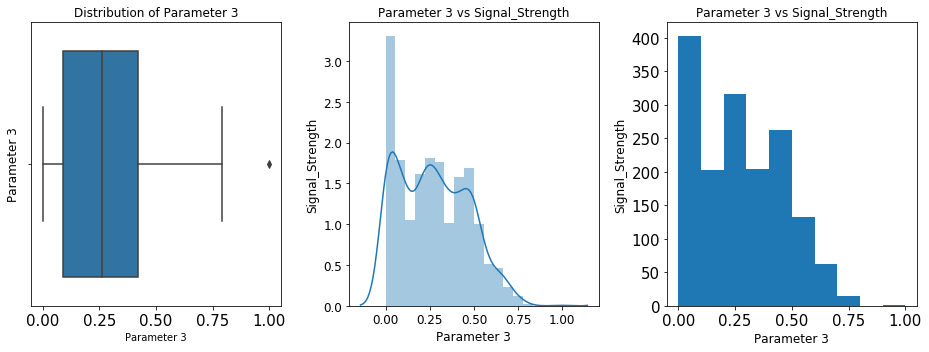

In [31]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 3',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 3', fontsize=12)
ax1.set_title('Distribution of Parameter 3', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 3'],ax=ax2)
ax2.set_xlabel('Parameter 3', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 3 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 3'])
ax3.set_xlabel('Parameter 3', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 3 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [32]:
#discription of each features
#Parameter 4
print('Range of values: ', signal_df['Parameter 4'].max()-signal_df['Parameter 4'].min())

Range of values:  14.6


In [33]:
#Parameter 4
print('Minimum: ', signal_df['Parameter 4'].min())
print('Maximum: ',signal_df['Parameter 4'].max())
print('Mean value: ', signal_df['Parameter 4'].mean())
print('Median value: ',signal_df['Parameter 4'].median())
print('Standard deviation: ', signal_df['Parameter 4'].std())

Minimum:  0.9
Maximum:  15.5
Mean value:  2.5388055034396517
Median value:  2.2
Standard deviation:  1.4099280595072805


In [34]:
#finding the outliers
Q1=signal_df['Parameter 4'].quantile(q=0.25)
Q3=signal_df['Parameter 4'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 4']))

1st Quartile (Q1) is:  1.9
3st Quartile (Q3) is:  2.6
Interquartile range (IQR) is  0.7000000000000002


In [35]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 4: ', L_outliers)
print('Upper outliers in Parameter 4: ', U_outliers)

Lower outliers in Parameter 4:  0.8499999999999996
Upper outliers in Parameter 4:  3.6500000000000004


In [36]:
print('Number of outliers in Parameter 4 upper : ', signal_df[signal_df['Parameter 4']> 3.6500000000000004]['Parameter 4'].count())
print('Number of outliers in Parameter 4 lower : ', signal_df[signal_df['Parameter 4']< 0.8499999999999996]['Parameter 4'].count())
print('% of Outlier in Parameter 4 upper: ',round(signal_df[signal_df['Parameter 4']> 3.6500000000000004]['Parameter 4'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 4 lower: ',round(signal_df[signal_df['Parameter 4']< 0.8499999999999996]['Parameter 4'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 4 upper :  155
Number of outliers in Parameter 4 lower :  0
% of Outlier in Parameter 4 upper:  10.0 %
% of Outlier in Parameter 4 lower:  0.0 %


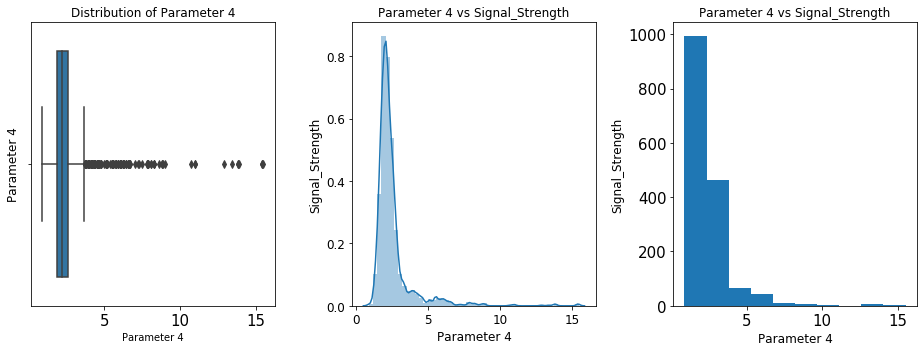

In [37]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 4',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 4', fontsize=12)
ax1.set_title('Distribution of Parameter 4', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 4'],ax=ax2)
ax2.set_xlabel('Parameter 4', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 4 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 4'])
ax3.set_xlabel('Parameter 4', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 4 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [38]:
#discription of each features
#Parameter 5
print('Range of values: ', signal_df['Parameter 5'].max()-signal_df['Parameter 5'].min())

Range of values:  0.599


In [39]:
#Parameter 5
print('Minimum: ', signal_df['Parameter 5'].min())
print('Maximum: ',signal_df['Parameter 5'].max())
print('Mean value: ', signal_df['Parameter 5'].mean())
print('Median value: ',signal_df['Parameter 5'].median())
print('Standard deviation: ', signal_df['Parameter 5'].std())

Minimum:  0.012
Maximum:  0.611
Mean value:  0.08746654158849257
Median value:  0.079
Standard deviation:  0.047065302010090154


In [40]:
#finding the outliers
Q1=signal_df['Parameter 5'].quantile(q=0.25)
Q3=signal_df['Parameter 5'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 5']))

1st Quartile (Q1) is:  0.07
3st Quartile (Q3) is:  0.09
Interquartile range (IQR) is  0.01999999999999999


In [41]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 5: ', L_outliers)
print('Upper outliers in Parameter 5: ', U_outliers)

Lower outliers in Parameter 5:  0.04000000000000002
Upper outliers in Parameter 5:  0.11999999999999998


In [42]:
print('Number of outliers in Parameter 5 upper : ', signal_df[signal_df['Parameter 5']>0.11999999999999998]['Parameter 5'].count())
print('Number of outliers in Parameter 5 lower : ', signal_df[signal_df['Parameter 5']<0.04000000000000002]['Parameter 5'].count())
print('% of Outlier in Parameter 5 upper: ',round(signal_df[signal_df['Parameter 5']>0.11999999999999998]['Parameter 5'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 5 lower: ',round(signal_df[signal_df['Parameter 5']<0.04000000000000002]['Parameter 5'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 5 upper :  103
Number of outliers in Parameter 5 lower :  9
% of Outlier in Parameter 5 upper:  6.0 %
% of Outlier in Parameter 5 lower:  1.0 %


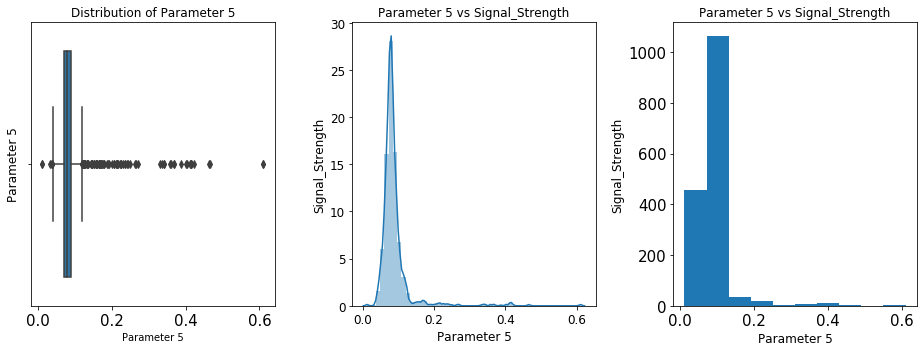

In [43]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 5',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 5', fontsize=12)
ax1.set_title('Distribution of Parameter 5', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 5'],ax=ax2)
ax2.set_xlabel('Parameter 5', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 5 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 5'])
ax3.set_xlabel('Parameter 5', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 5 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [44]:
#discription of each features
#Parameter 6
print('Range of values: ', signal_df['Parameter 6'].max()-signal_df['Parameter 6'].min())

Range of values:  71.0


In [45]:
#Parameter 6
print('Minimum: ', signal_df['Parameter 6'].min())
print('Maximum: ',signal_df['Parameter 6'].max())
print('Mean value: ', signal_df['Parameter 6'].mean())
print('Median value: ',signal_df['Parameter 6'].median())
print('Standard deviation: ', signal_df['Parameter 6'].std())

Minimum:  1.0
Maximum:  72.0
Mean value:  15.874921826141339
Median value:  14.0
Standard deviation:  10.46015696980973


In [46]:
#finding the outliers
Q1=signal_df['Parameter 6'].quantile(q=0.25)
Q3=signal_df['Parameter 6'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 6']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  21.0
Interquartile range (IQR) is  14.0


In [47]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 6: ', L_outliers)
print('Upper outliers in Parameter 6: ', U_outliers)

Lower outliers in Parameter 6:  -14.0
Upper outliers in Parameter 6:  42.0


In [48]:
print('Number of outliers in Parameter 6 upper : ', signal_df[signal_df['Parameter 6']>42.0]['Parameter 6'].count())
print('Number of outliers in Parameter 6 lower : ', signal_df[signal_df['Parameter 6']<-14.0]['Parameter 6'].count())
print('% of Outlier in Parameter 6 upper: ',round(signal_df[signal_df['Parameter 6']>42.0]['Parameter 6'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 6 lower: ',round(signal_df[signal_df['Parameter 6']<-14.0]['Parameter 6'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 6 upper :  30
Number of outliers in Parameter 6 lower :  0
% of Outlier in Parameter 6 upper:  2.0 %
% of Outlier in Parameter 6 lower:  0.0 %


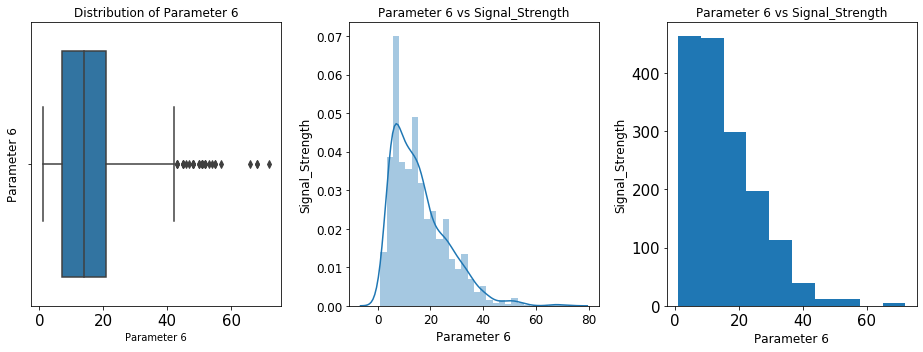

In [49]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 6',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 6', fontsize=12)
ax1.set_title('Distribution of Parameter 6', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 6'],ax=ax2)
ax2.set_xlabel('Parameter 6', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 6 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 6'])
ax3.set_xlabel('Parameter 6', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 6 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [50]:
#discription of each features
#Parameter 7
print('Range of values: ', signal_df['Parameter 7'].max()-signal_df['Parameter 7'].min())

Range of values:  283.0


In [51]:
#Parameter 7
print('Minimum: ', signal_df['Parameter 7'].min())
print('Maximum: ',signal_df['Parameter 7'].max())
print('Mean value: ', signal_df['Parameter 7'].mean())
print('Median value: ',signal_df['Parameter 7'].median())
print('Standard deviation: ', signal_df['Parameter 7'].std())

Minimum:  6.0
Maximum:  289.0
Mean value:  46.46779237023139
Median value:  38.0
Standard deviation:  32.89532447829901


In [52]:
#finding the outliers
Q1=signal_df['Parameter 7'].quantile(q=0.25)
Q3=signal_df['Parameter 7'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 7']))

1st Quartile (Q1) is:  22.0
3st Quartile (Q3) is:  62.0
Interquartile range (IQR) is  40.0


In [53]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 7: ', L_outliers)
print('Upper outliers in Parameter 7: ', U_outliers)

Lower outliers in Parameter 7:  -38.0
Upper outliers in Parameter 7:  122.0


In [54]:
print('Number of outliers in Parameter 7 upper : ', signal_df[signal_df['Parameter 7']>122.0]['Parameter 7'].count())
print('Number of outliers in Parameter 7 lower : ', signal_df[signal_df['Parameter 7']<-38.0]['Parameter 7'].count())
print('% of Outlier in Parameter 7 upper: ',round(signal_df[signal_df['Parameter 7']>122.0]['Parameter 7'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 7 lower: ',round(signal_df[signal_df['Parameter 7']<-38.0]['Parameter 7'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 7 upper :  55
Number of outliers in Parameter 7 lower :  0
% of Outlier in Parameter 7 upper:  3.0 %
% of Outlier in Parameter 7 lower:  0.0 %


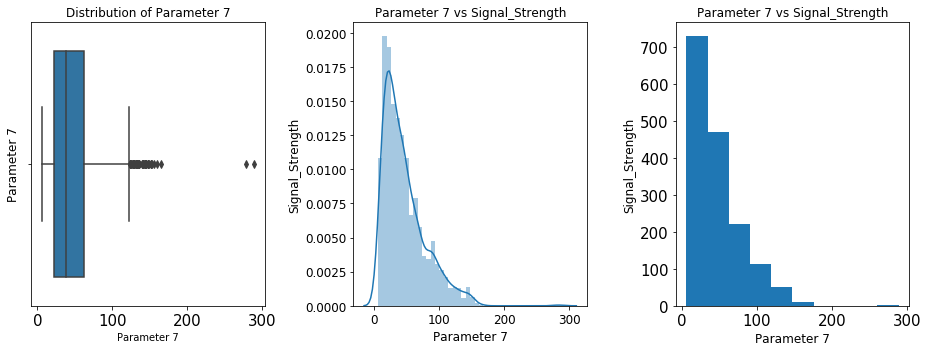

In [55]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 7',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 7', fontsize=12)
ax1.set_title('Distribution of Parameter 7', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 7'],ax=ax2)
ax2.set_xlabel('Parameter 7', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 7 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 7'])
ax3.set_xlabel('Parameter 7', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 7 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [56]:
#discription of each features
#Parameter 8
print('Range of values: ', signal_df['Parameter 8'].max()-signal_df['Parameter 8'].min())

Range of values:  0.013619999999999854


In [57]:
#Parameter 8
print('Minimum: ', signal_df['Parameter 8'].min())
print('Maximum: ',signal_df['Parameter 8'].max())
print('Mean value: ', signal_df['Parameter 8'].mean())
print('Median value: ',signal_df['Parameter 8'].median())
print('Standard deviation: ', signal_df['Parameter 8'].std())

Minimum:  0.9900700000000001
Maximum:  1.00369
Mean value:  0.9967466791744833
Median value:  0.99675
Standard deviation:  0.0018873339538425563


In [58]:
#finding the outliers
Q1=signal_df['Parameter 8'].quantile(q=0.25)
Q3=signal_df['Parameter 8'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 8']))

1st Quartile (Q1) is:  0.9956
3st Quartile (Q3) is:  0.9978349999999999
Interquartile range (IQR) is  0.002234999999999876


In [59]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 8: ', L_outliers)
print('Upper outliers in Parameter 8: ', U_outliers)

Lower outliers in Parameter 8:  0.9922475000000002
Upper outliers in Parameter 8:  1.0011874999999997


In [60]:
print('Number of outliers in Parameter 8 upper : ', signal_df[signal_df['Parameter 8']>1.0011874999999997]['Parameter 8'].count())
print('Number of outliers in Parameter 8 lower : ', signal_df[signal_df['Parameter 8']<0.9922475000000002]['Parameter 8'].count())
print('% of Outlier in Parameter 8 upper: ',round(signal_df[signal_df['Parameter 8']>1.0011874999999997]['Parameter 8'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 8 lower: ',round(signal_df[signal_df['Parameter 8']<0.9922475000000002]['Parameter 8'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 8 upper :  24
Number of outliers in Parameter 8 lower :  21
% of Outlier in Parameter 8 upper:  2.0 %
% of Outlier in Parameter 8 lower:  1.0 %


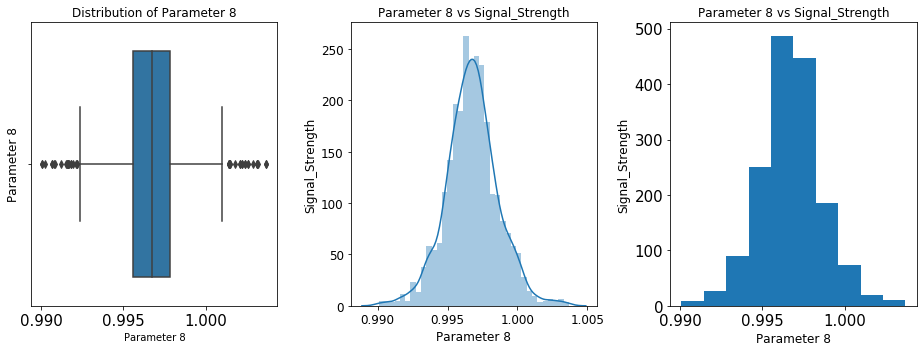

In [61]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 8',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 8', fontsize=12)
ax1.set_title('Distribution of Parameter 8', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 8'],ax=ax2)
ax2.set_xlabel('Parameter 8', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 8 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 8'])
ax3.set_xlabel('Parameter 8', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 8 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [62]:
#discription of each features
#Parameter 9
print('Range of values: ', signal_df['Parameter 9'].max()-signal_df['Parameter 9'].min())

Range of values:  1.2699999999999996


In [63]:
#Parameter 9
print('Minimum: ', signal_df['Parameter 9'].min())
print('Maximum: ',signal_df['Parameter 9'].max())
print('Mean value: ', signal_df['Parameter 9'].mean())
print('Median value: ',signal_df['Parameter 9'].median())
print('Standard deviation: ', signal_df['Parameter 9'].std())

Minimum:  2.74
Maximum:  4.01
Mean value:  3.311113195747343
Median value:  3.31
Standard deviation:  0.15438646490354266


In [64]:
#finding the outliers
Q1=signal_df['Parameter 9'].quantile(q=0.25)
Q3=signal_df['Parameter 9'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 9']))

1st Quartile (Q1) is:  3.21
3st Quartile (Q3) is:  3.4
Interquartile range (IQR) is  0.18999999999999995


In [65]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 9: ', L_outliers)
print('Upper outliers in Parameter 9: ', U_outliers)

Lower outliers in Parameter 9:  2.925
Upper outliers in Parameter 9:  3.6849999999999996


In [66]:
print('Number of outliers in Parameter 9 upper : ', signal_df[signal_df['Parameter 9']>3.6849999999999996]['Parameter 9'].count())
print('Number of outliers in Parameter 9 lower : ', signal_df[signal_df['Parameter 9']<2.925]['Parameter 9'].count())
print('% of Outlier in Parameter 9 upper: ',round(signal_df[signal_df['Parameter 9']>3.6849999999999996]['Parameter 9'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 9 lower: ',round(signal_df[signal_df['Parameter 9']<2.925]['Parameter 9'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 9 upper :  21
Number of outliers in Parameter 9 lower :  14
% of Outlier in Parameter 9 upper:  1.0 %
% of Outlier in Parameter 9 lower:  1.0 %


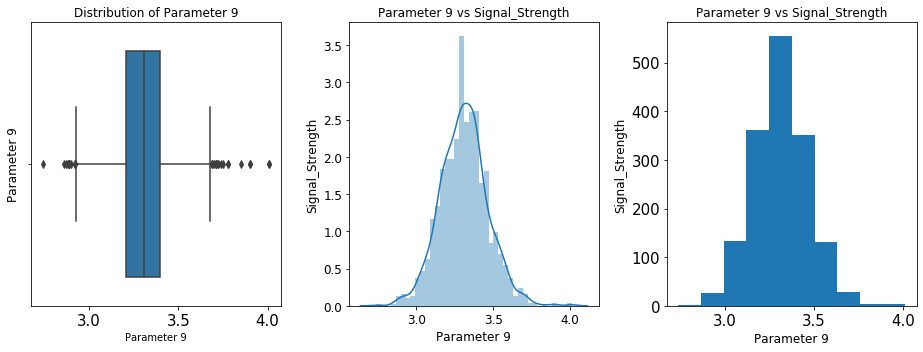

In [67]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 9',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 9', fontsize=12)
ax1.set_title('Distribution of Parameter 9', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 9'],ax=ax2)
ax2.set_xlabel('Parameter 9', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 9 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 9'])
ax3.set_xlabel('Parameter 9', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 9 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [68]:
#discription of each features
#Parameter 10
print('Range of values: ', signal_df['Parameter 10'].max()-signal_df['Parameter 10'].min())

Range of values:  1.67


In [69]:
#Parameter 10
print('Minimum: ', signal_df['Parameter 10'].min())
print('Maximum: ',signal_df['Parameter 10'].max())
print('Mean value: ', signal_df['Parameter 10'].mean())
print('Median value: ',signal_df['Parameter 10'].median())
print('Standard deviation: ', signal_df['Parameter 10'].std())

Minimum:  0.33
Maximum:  2.0
Mean value:  0.6581488430268921
Median value:  0.62
Standard deviation:  0.16950697959010977


In [70]:
#finding the outliers
Q1=signal_df['Parameter 10'].quantile(q=0.25)
Q3=signal_df['Parameter 10'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 10']))

1st Quartile (Q1) is:  0.55
3st Quartile (Q3) is:  0.73
Interquartile range (IQR) is  0.17999999999999994


In [71]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 10: ', L_outliers)
print('Upper outliers in Parameter 10: ', U_outliers)

Lower outliers in Parameter 10:  0.28000000000000014
Upper outliers in Parameter 10:  0.9999999999999999


In [72]:
print('Number of outliers in Parameter 10 upper : ', signal_df[signal_df['Parameter 10']>0.9999999999999999]['Parameter 10'].count())
print('Number of outliers in Parameter 10 lower : ', signal_df[signal_df['Parameter 10']<0.28000000000000014]['Parameter 10'].count())
print('% of Outlier in Parameter 10 upper: ',round(signal_df[signal_df['Parameter 10']>0.9999999999999999]['Parameter 10'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 10 lower: ',round(signal_df[signal_df['Parameter 10']<0.28000000000000014]['Parameter 10'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 10 upper :  59
Number of outliers in Parameter 10 lower :  0
% of Outlier in Parameter 10 upper:  4.0 %
% of Outlier in Parameter 10 lower:  0.0 %


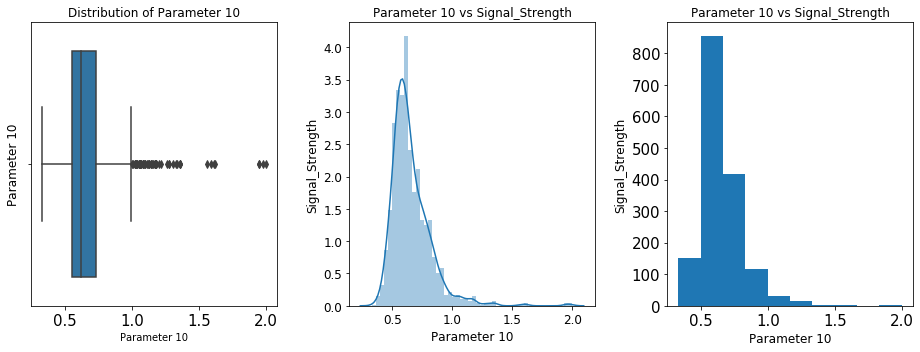

In [73]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 10',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 10', fontsize=12)
ax1.set_title('Distribution of Parameter 10', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 10'],ax=ax2)
ax2.set_xlabel('Parameter 10', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 10 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 10'])
ax3.set_xlabel('Parameter 10', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 10 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [74]:
#discription of each features
#Parameter 11
print('Range of values: ', signal_df['Parameter 11'].max()-signal_df['Parameter 11'].min())

Range of values:  6.5


In [75]:
#Parameter 11
print('Minimum: ', signal_df['Parameter 10'].min())
print('Maximum: ',signal_df['Parameter 10'].max())
print('Mean value: ', signal_df['Parameter 10'].mean())
print('Median value: ',signal_df['Parameter 10'].median())
print('Standard deviation: ', signal_df['Parameter 10'].std())

Minimum:  0.33
Maximum:  2.0
Mean value:  0.6581488430268921
Median value:  0.62
Standard deviation:  0.16950697959010977


In [76]:
#finding the outliers
Q1=signal_df['Parameter 11'].quantile(q=0.25)
Q3=signal_df['Parameter 11'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(signal_df['Parameter 11']))

1st Quartile (Q1) is:  9.5
3st Quartile (Q3) is:  11.1
Interquartile range (IQR) is  1.5999999999999996


In [77]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Parameter 11: ', L_outliers)
print('Upper outliers in Parameter 11: ', U_outliers)

Lower outliers in Parameter 11:  7.1000000000000005
Upper outliers in Parameter 11:  13.5


In [78]:
print('Number of outliers in Parameter 11 upper : ', signal_df[signal_df['Parameter 11']>13.5]['Parameter 11'].count())
print('Number of outliers in Parameter 11 lower : ', signal_df[signal_df['Parameter 11']< 7.1000000000000005]['Parameter 11'].count())
print('% of Outlier in Parameter 11 upper: ',round(signal_df[signal_df['Parameter 11']>13.5]['Parameter 11'].count()*100/len(signal_df)), '%')
print('% of Outlier in Parameter 11 lower: ',round(signal_df[signal_df['Parameter 11']< 7.1000000000000005]['Parameter 11'].count()*100/len(signal_df)), '%')

Number of outliers in Parameter 11 upper :  13
Number of outliers in Parameter 11 lower :  0
% of Outlier in Parameter 11 upper:  1.0 %
% of Outlier in Parameter 11 lower:  0.0 %


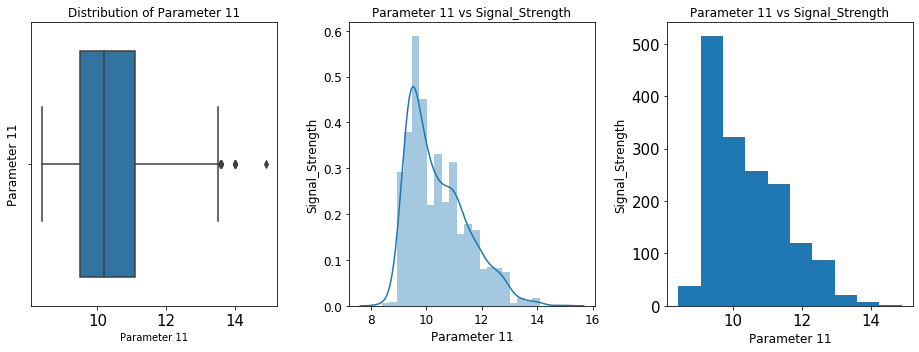

In [79]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='Parameter 11',data=signal_df,orient='h',ax=ax1)
ax1.set_ylabel('Parameter 11', fontsize=12)
ax1.set_title('Distribution of Parameter 11', fontsize=12)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(signal_df['Parameter 11'],ax=ax2)
ax2.set_xlabel('Parameter 11', fontsize=12)
ax2.set_ylabel('Signal_Strength', fontsize=12)
ax2.set_title('Parameter 11 vs Signal_Strength', fontsize=12)
ax2.tick_params(labelsize=12)

#histogram
ax3.hist(signal_df['Parameter 11'])
ax3.set_xlabel('Parameter 11', fontsize=12)
ax3.set_ylabel('Signal_Strength', fontsize=12)
ax3.set_title('Parameter 11 vs Signal_Strength', fontsize=12)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0C39877F0>,
      dtype=object)

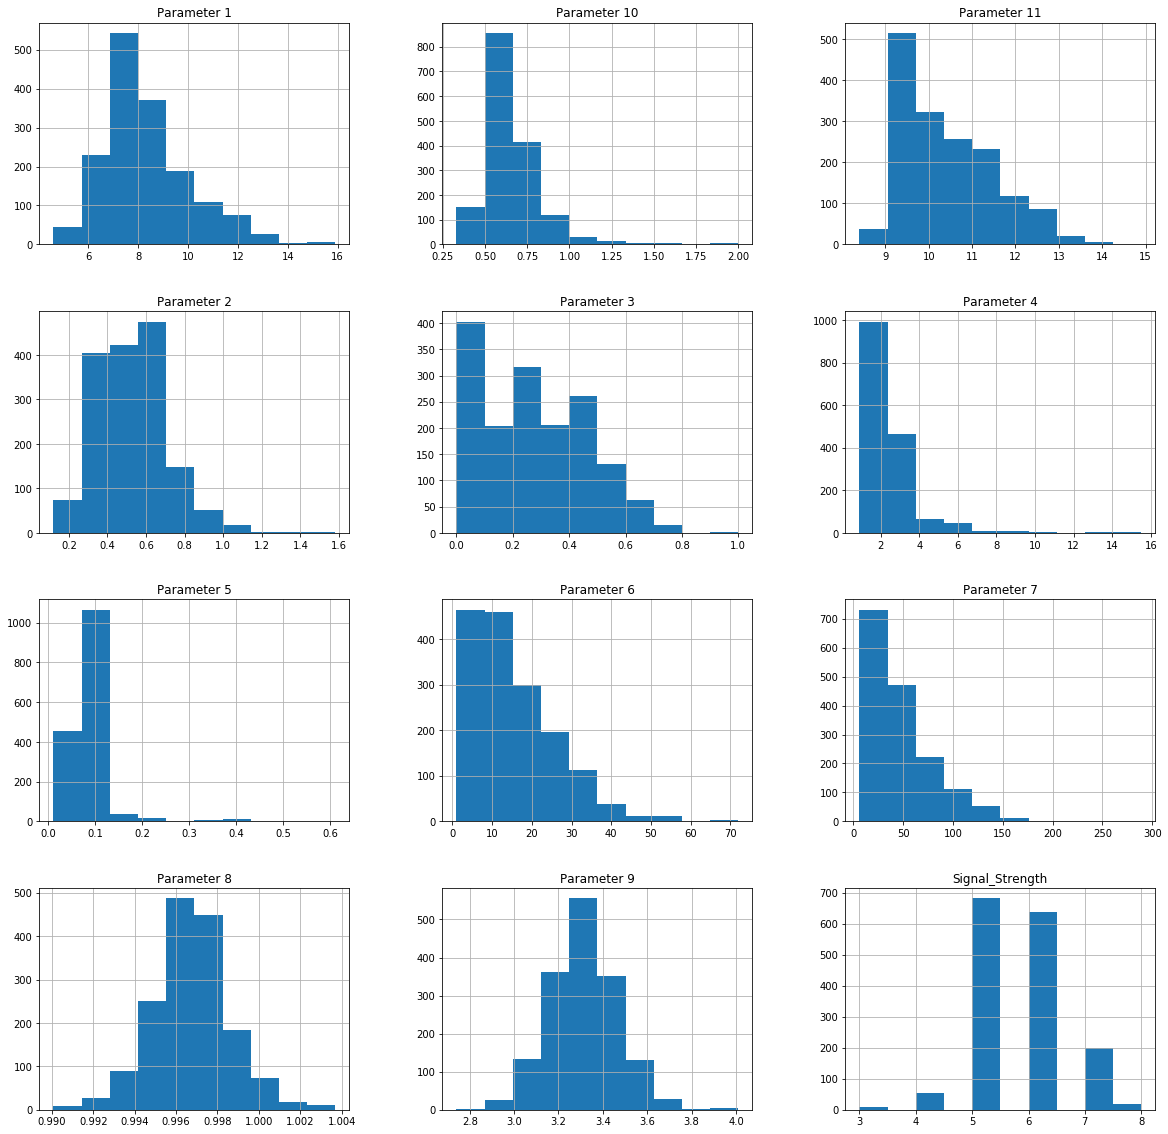

In [80]:
# Histogram 
signal_df.hist(figsize=(20,20))

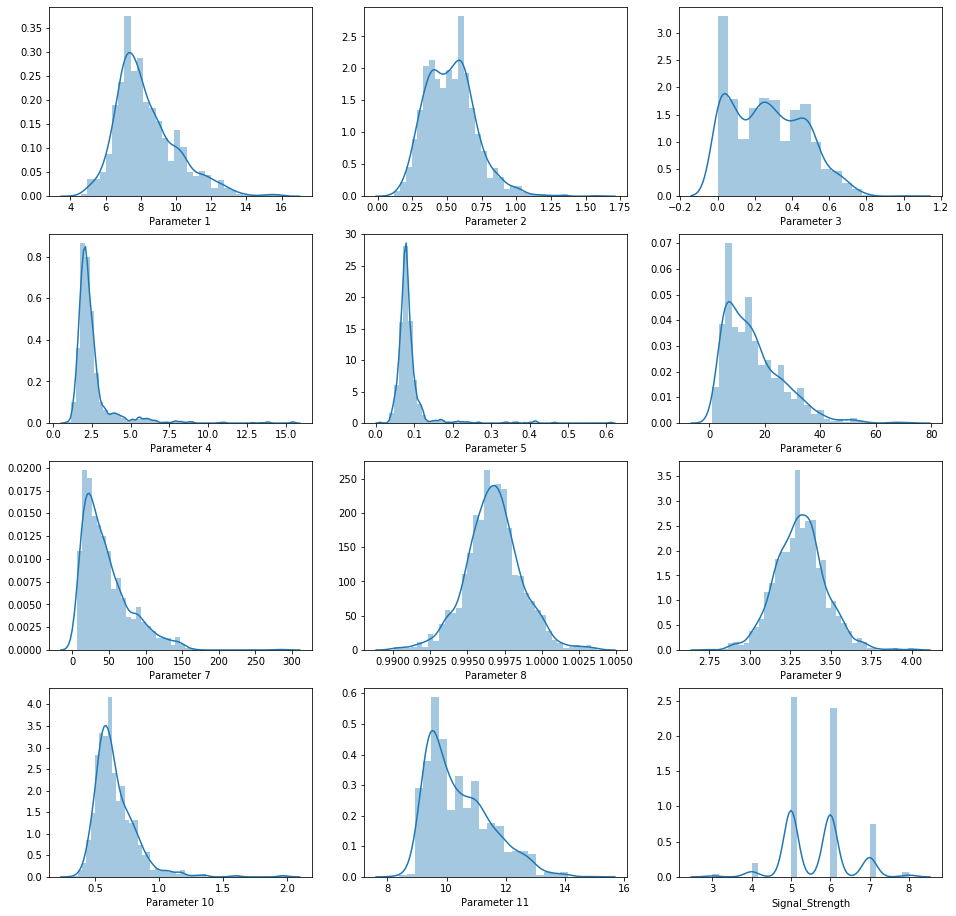

In [81]:
# Distplot
fig, ax2 = plt.subplots(4, 3, figsize=(16, 16))
sns.distplot(signal_df['Parameter 1'],ax=ax2[0][0])
sns.distplot(signal_df['Parameter 2'],ax=ax2[0][1])
sns.distplot(signal_df['Parameter 3'],ax=ax2[0][2])
sns.distplot(signal_df['Parameter 4'],ax=ax2[1][0])
sns.distplot(signal_df['Parameter 5'],ax=ax2[1][1])
sns.distplot(signal_df['Parameter 6'],ax=ax2[1][2])
sns.distplot(signal_df['Parameter 7'],ax=ax2[2][0])
sns.distplot(signal_df['Parameter 8'],ax=ax2[2][1])
sns.distplot(signal_df['Parameter 9'],ax=ax2[2][2])
sns.distplot(signal_df['Parameter 10'],ax=ax2[3][0])
sns.distplot(signal_df['Parameter 11'],ax=ax2[3][1])
sns.distplot(signal_df['Signal_Strength'],ax=ax2[3][2])


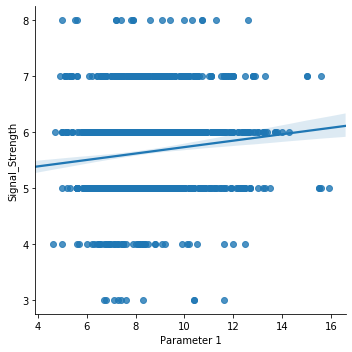

In [82]:
#signal_strength vs parameter 1
sns.lmplot(x="Parameter 1",y="Signal_Strength",data=signal_df)
plt.show()
#shows parameter 1 showing little postive correlation

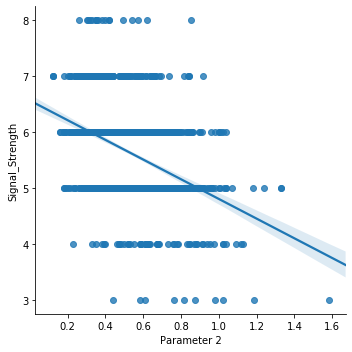

In [83]:
# parameter 2 vs signal_strenght
#lm plot
sns.lmplot(x="Parameter 2",y="Signal_Strength",data=signal_df)
plt.show()
#slightly negative correlation 

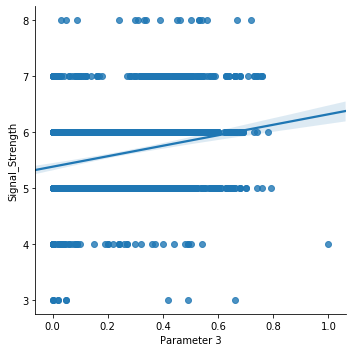

In [84]:
# parameter 3 vs signal_strenght
#lm plot
sns.lmplot(x="Parameter 3",y="Signal_Strength",data=signal_df)
plt.show()
#slightly positive correlation 

In [85]:

signal_df.shape #shape of the data

(1599, 12)

In [86]:
signal_df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [87]:
#building the neural networks regressor 
from sklearn.model_selection import train_test_split
#independent and dependent variables
X=signal_df.iloc[:,0:11]
y = signal_df.iloc[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [88]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1024, kernel_initializer='he_normal',input_dim = X_train.shape[1], activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.5))
# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='he_normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.5))
NN_model.add(Dense(512, kernel_initializer='he_normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.5))
NN_model.add(Dense(512, kernel_initializer='he_normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.5))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='he_normal',activation='linear'))

# Compile the network :
adam = optimizers.adam(lr = 0.00001)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              12288     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
______________________

In [89]:
#adam = optimizers.adam(lr = 0.0001)
#keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_3 = NN_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 20, epochs = 100, verbose = 1)


Train on 959 samples, validate on 320 samples
Epoch 1/100
959/959 [==============================] - 5s 5ms/step - loss: 5.0200 - acc: 0.0094 - val_loss: 4.2541 - val_acc: 0.0000e+00
Epoch 2/100
959/959 [==============================] - 1s 2ms/step - loss: 3.6671 - acc: 0.0574 - val_loss: 2.1814 - val_acc: 0.0688
Epoch 3/100
959/959 [==============================] - 1s 1ms/step - loss: 2.4583 - acc: 0.1324 - val_loss: 0.7329 - val_acc: 0.4500
Epoch 4/100
959/959 [==============================] - 1s 1ms/step - loss: 1.9340 - acc: 0.1783 - val_loss: 1.4800 - val_acc: 0.2406
Epoch 5/100
959/959 [==============================] - 1s 2ms/step - loss: 1.7310 - acc: 0.1919 - val_loss: 0.9386 - val_acc: 0.3156
Epoch 6/100
959/959 [==============================] - 1s 1ms/step - loss: 1.6083 - acc: 0.2013 - val_loss: 0.8628 - val_acc: 0.3719
Epoch 7/100
959/959 [==============================] - 1s 1ms/step - loss: 1.5451 - acc: 0.2106 - val_loss: 0.8382 - val_acc: 0.4188
Epoch 8/100
959/95

In [90]:
results = NN_model.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results[1])

320/320 [==============================] - 0s 195us/step
Val_acc using BatchNorm and Dropout adam :  0.590625


In [91]:
NN_model.predict(X_test)

array([[5.6961493],
       [5.259662 ],
       [6.217923 ],
       [5.6506214],
       [6.6960344],
       [6.068437 ],
       [6.299168 ],
       [5.035909 ],
       [6.4046926],
       [5.35804  ],
       [5.9641232],
       [5.26273  ],
       [5.362713 ],
       [6.379367 ],
       [5.603907 ],
       [5.2369194],
       [6.044584 ],
       [5.4736056],
       [5.658603 ],
       [5.477321 ],
       [5.490204 ],
       [6.0412955],
       [5.3298335],
       [6.743852 ],
       [5.147655 ],
       [6.3176723],
       [5.9224715],
       [5.477214 ],
       [5.148233 ],
       [3.2686596],
       [5.4197125],
       [6.6347275],
       [5.1070437],
       [6.236774 ],
       [5.0972757],
       [5.44166  ],
       [5.3533597],
       [5.430761 ],
       [6.263373 ],
       [5.3113155],
       [6.105765 ],
       [4.5382967],
       [5.07838  ],
       [6.0501666],
       [4.956261 ],
       [5.6143622],
       [5.1601534],
       [5.372509 ],
       [5.113795 ],
       [5.377091 ],


In [106]:
#building the neural network classifier

keras_model = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(1024, kernel_initializer='he_normal',input_dim = X_train.shape[1]))
#Adding BatchNormalization Layer
keras_model.add(BatchNormalization())
#Adding Activation function
keras_model.add(Activation('relu'))
#Adding Dropout Layer
keras_model.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(512,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model.add(BatchNormalization())
#Adding Activation function
keras_model.add(Activation('relu'))
#Adding Dropout Layer
keras_model.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(512, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model.add(BatchNormalization())
#Adding Activation function
keras_model.add(Activation('relu'))
#Adding Dropout Layer
keras_model.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(512, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model.add(BatchNormalization())
#Adding Activation function
keras_model.add(Activation('relu'))
#Adding Dropout Layer
keras_model.add(Dropout(0.5))

#Adding forth Hidden layer
keras_model.add(Dense(512, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model.add(BatchNormalization())
#Adding Activation function
keras_model.add(Activation('relu'))
#Adding Dropout Layer
keras_model.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [107]:
keras_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1024)              12288     
_________________________________________________________________
batch_normalization_19 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_18 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
__________

In [108]:
adam = optimizers.adam(lr = 0.0001)
keras_model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

In [109]:
history_3 = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 20, epochs = 100, verbose = 1)

Train on 959 samples, validate on 320 samples
Epoch 1/100
959/959 [==============================] - 6s 6ms/step - loss: 2.7463 - acc: 0.1491 - val_loss: 1.9042 - val_acc: 0.4344
Epoch 2/100
959/959 [==============================] - 1s 2ms/step - loss: 2.0401 - acc: 0.3107 - val_loss: 1.6844 - val_acc: 0.4719
Epoch 3/100
959/959 [==============================] - 2s 2ms/step - loss: 1.8493 - acc: 0.3525 - val_loss: 1.5520 - val_acc: 0.4687
Epoch 4/100
959/959 [==============================] - 2s 2ms/step - loss: 1.6757 - acc: 0.3983 - val_loss: 1.4865 - val_acc: 0.4562
Epoch 5/100
959/959 [==============================] - 2s 2ms/step - loss: 1.6367 - acc: 0.4171 - val_loss: 1.4237 - val_acc: 0.4531
Epoch 6/100
959/959 [==============================] - 2s 2ms/step - loss: 1.6015 - acc: 0.3973 - val_loss: 1.3826 - val_acc: 0.4437
Epoch 7/100
959/959 [==============================] - 2s 2ms/step - loss: 1.5709 - acc: 0.4025 - val_loss: 1.3433 - val_acc: 0.4500
Epoch 8/100
959/959 [==

In [112]:
results_1 = keras_model.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_1[1])

320/320 [==============================] - 0s 343us/step
Val_acc using BatchNorm and Dropout adam :  0.56875


In [113]:
keras_model.predict(X_test)

array([[2.73457670e-04, 1.21509045e-04, 1.17094060e-04, ...,
        5.27377017e-02, 2.91141798e-03, 2.60141271e-04],
       [1.77306050e-04, 8.35297833e-05, 1.10330111e-04, ...,
        2.79845875e-02, 1.93615537e-03, 2.17714885e-04],
       [7.31263834e-04, 8.39436601e-04, 5.59985812e-04, ...,
        4.66123164e-01, 2.72615515e-02, 7.13319983e-04],
       ...,
       [3.05047550e-04, 1.42615987e-04, 1.37637137e-04, ...,
        6.67885169e-02, 4.10906645e-03, 3.28722934e-04],
       [6.20391918e-04, 4.60762763e-04, 3.62069724e-04, ...,
        2.85214245e-01, 1.50994174e-02, 6.07446884e-04],
       [4.45436337e-04, 3.46360379e-04, 2.80378736e-04, ...,
        3.56234670e-01, 1.21941995e-02, 4.19416960e-04]], dtype=float32)

In [114]:
#as we can see the accuracy of the models both the regressor and classifiers are improving with change in the learning rates.
#and also using the batch normaization and dropout techinques we can overcome overfitting.
#in both the cases we are getting the accuracy closer around 60% still it can be improved either by changing the hyperparameter values.